In [1]:
#import libraries
import pandas as pd 
import pyreadstat
import numpy as np
from sklearn.preprocessing import MinMaxScaler





# Data Exploration
before analysis I prepared the data by only selecting the columns of interest out of a total of 2,605 columns in the original dataset. I selected 18 columns to focus on for analysis. In this section I cleaned up the column names and addressed null values. 

In [2]:
#Open SPSS file and save as dataframe 
# Path to your SPSS file
file_path = "/Users/priscillamorales/Downloads/NSDUH-2022-DS0001-bndl-data-spss_v1/NSDUH_2022.sav"

# Read the SPSS file using pyreadstat
df, meta = pyreadstat.read_sav(file_path)

# df is already a pandas dataframe, so you can work with it directly
df.head()

,QUESTID2,FILEDATE,ANALWT2_C,VESTR_C,VEREP,PDEN10,COUTYP4,MAIIN102,AIIND102,AGE3,...,COSUTELE2,COSUAPTDL2,COSURXDL2,COSUSVHLT2,COHCTELE2,COHCAPTDL2,COHCRXDL2,COHCSVHLT2,LANGVER,GQTYPE2
0,10000330.0,10/19/2023,298.004021,40030.0,2.0,1.0,1.0,2.0,2.0,6.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,
1,10000425.0,10/19/2023,2292.377696,40002.0,1.0,2.0,2.0,2.0,2.0,9.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,
2,10002771.0,10/19/2023,216.604339,40041.0,2.0,1.0,1.0,2.0,2.0,6.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,
3,10005250.0,10/19/2023,13828.218374,40012.0,2.0,2.0,1.0,2.0,2.0,7.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,
4,10005432.0,10/19/2023,6282.612060,40037.0,1.0,2.0,2.0,2.0,2.0,10.0,...,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,1.0,


In [3]:
#Create new dataframe with only the columns of interest on mental health, education and programs

Columns_list = ["AGE3", "SPEAKENGL", "IRSEX", "LVLDIFWALK2", "LVLDIFMEM2",
               "LVLDIFCARE2", "NEWRACE2", "EDUHIGHCAT", 
               "HEALTH2", "WRKSTATWK2", "WHODASSCED", "YEPPROUD", "YEPRBSLV", "YEVIOPRV",
               "YEDGPRGP", "YECOMACT", "KSSLR6MONED", "SNRLGIMP" ]
small_df = df[Columns_list]
small_df.head()


,AGE3,SPEAKENGL,IRSEX,LVLDIFWALK2,LVLDIFMEM2,LVLDIFCARE2,NEWRACE2,EDUHIGHCAT,HEALTH2,WRKSTATWK2,WHODASSCED,YEPPROUD,YEPRBSLV,YEVIOPRV,YEDGPRGP,YECOMACT,KSSLR6MONED,SNRLGIMP
0,6.0,3.0,1.0,3.0,3.0,3.0,7.0,1.0,1.0,4.0,0.0,99.0,99.0,99.0,99.0,99.0,0.0,3.0
1,9.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,7.0,99.0,99.0,99.0,99.0,99.0,1.0,3.0
2,6.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,8.0,2.0
3,7.0,2.0,1.0,3.0,3.0,1.0,5.0,2.0,1.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,3.0,4.0
4,10.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,10.0,99.0,99.0,99.0,99.0,99.0,6.0,1.0


In [4]:
#change column names to be more readable 

new_df = small_df.rename (columns= {"AGE3": "Age", "SPEAKENGL":"English Fluency", "LVLDIFWALK2": "Difficulty Walking", "LVLDIFMEM2": "Difficulty Concentrating", 
                              "LVLDIFCARE2": "Difficulty with Self Care", "NEWRACE2": "Race", "IRSEX": "Gender", 
                              "EDUHIGHCAT": "Education", "HEALTH2": "Overall Health Record", "WRKSTATWK2": "Work Status", "WHODASSCED": " Level of Impairment", 
                             "YEPPROUD": "Parents Proud", "YEPRBSLV": "Problem Solving Group", "YEVIOPRV": "Violence Prevention Program", 
                    "YEDGPRGP": "Alc and Drug Prevention Program", "YECOMACT": "Community Based Activities", "KSSLR6MONED": "Level of Psychological Distress", "SNRLGIMP": "Religious Importance" })


In [5]:
#View the new df with updates column names 
new_df

,Age,English Fluency,Gender,Difficulty Walking,Difficulty Concentrating,Difficulty with Self Care,Race,Education,Overall Health Record,Work Status,Level of Impairment,Parents Proud,Problem Solving Group,Violence Prevention Program,Alc and Drug Prevention Program,Community Based Activities,Level of Psychological Distress,Religious Importance
0,6.0,3.0,1.0,3.0,3.0,3.0,7.0,1.0,1.0,4.0,0.0,99.0,99.0,99.0,99.0,99.0,0.0,3.0
1,9.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,7.0,99.0,99.0,99.0,99.0,99.0,1.0,3.0
2,6.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,8.0,2.0
3,7.0,2.0,1.0,3.0,3.0,1.0,5.0,2.0,1.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,3.0,4.0
4,10.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,10.0,99.0,99.0,99.0,99.0,99.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59064,1.0,1.0,1.0,2.0,2.0,2.0,1.0,5.0,4.0,99.0,NaN,4.0,2.0,1.0,2.0,0.0,NaN,99.0
59065,10.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,1.0,4.0
59066,8.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,0.0,3.0
59067,7.0,1.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,0.0,99.0,99.0,99.0,99.0,99.0,1.0,3.0


In [6]:
new_df.describe()

,Age,English Fluency,Gender,Difficulty Walking,Difficulty Concentrating,Difficulty with Self Care,Race,Education,Overall Health Record,Work Status,Level of Impairment,Parents Proud,Problem Solving Group,Violence Prevention Program,Alc and Drug Prevention Program,Community Based Activities,Level of Psychological Distress,Religious Importance
count,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,59056.000000,59069.000000,45779.000000,59069.000000,59069.000000,59069.000000,59069.000000,59069.000000,45659.000000,59069.000000
mean,6.624998,3.505714,1.542112,3.645093,3.940138,3.660973,2.706259,3.315208,2.304660,16.194434,5.115555,79.543500,79.851360,79.663021,79.639913,79.602719,5.188550,24.657130
std,3.074850,14.914730,0.498228,15.280316,15.271031,15.434134,2.436991,1.230717,0.927355,32.348209,6.281338,38.884862,38.621106,38.750619,38.767194,38.951755,5.336501,40.415945
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,2.000000
50%,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,99.000000,99.000000,99.000000,99.000000,99.000000,4.000000,3.000000
75%,9.000000,1.000000,2.000000,1.000000,2.000000,1.000000,5.000000,4.000000,3.000000,8.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,8.000000,4.000000
max,11.000000,98.000000,2.000000,98.000000,98.000000,98.000000,7.000000,5.000000,4.000000,99.000000,24.000000,99.000000,99.000000,99.000000,99.000000,99.000000,24.000000,99.000000


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59069 entries, 0 to 59068
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              59069 non-null  float64
 1   English Fluency                  59069 non-null  float64
 2   Gender                           59069 non-null  float64
 3   Difficulty Walking               59069 non-null  float64
 4   Difficulty Concentrating         59069 non-null  float64
 5   Difficulty with Self Care        59069 non-null  float64
 6   Race                             59069 non-null  float64
 7   Education                        59069 non-null  float64
 8   Overall Health Record            59056 non-null  float64
 9   Work Status                      59069 non-null  float64
 10   Level of Impairment             45779 non-null  float64
 11  Parents Proud                    59069 non-null  float64
 12  Problem Solving Gr

In [8]:
#Drop NA values and unuseable data
# Define the unwanted values
unwanted_values = [85, 94, 97, 98, 99]

#Because according to codebook: 85 = BAD DATA , 94 = DON'T KNOW, 97 = REFUSED, 98 = BLANK (NO ANSWER) , 99 = LEGITIMATE SKIP

# Replace unwanted values with NaN to simply dropping 
new_df = new_df.replace(unwanted_values, np.nan)



In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59069 entries, 0 to 59068
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              59069 non-null  float64
 1   English Fluency                  57612 non-null  float64
 2   Gender                           59069 non-null  float64
 3   Difficulty Walking               57534 non-null  float64
 4   Difficulty Concentrating         57528 non-null  float64
 5   Difficulty with Self Care        57502 non-null  float64
 6   Race                             59069 non-null  float64
 7   Education                        59069 non-null  float64
 8   Overall Health Record            59056 non-null  float64
 9   Work Status                      51263 non-null  float64
 10   Level of Impairment             45779 non-null  float64
 11  Parents Proud                    11813 non-null  float64
 12  Problem Solving Gr

I have decided to NOT drop NA values as there is likely one Null value per row. Thus, I would lose value data if I drop all Null. Replaced the "bad data" with null value instead of a number allows for a proper numerical analysis to be done with these data. I considered the option of replacing null values with mean value for the column, however, certain columns would have too much "made up" data to do so, thus the analysis below is done with null values included. 
I have also decided not to scale the data at this step. This is because the numerical values represent data labels and may not benefit from standarization as their meaning could be lost. 

In [10]:
new_df.head()

,Age,English Fluency,Gender,Difficulty Walking,Difficulty Concentrating,Difficulty with Self Care,Race,Education,Overall Health Record,Work Status,Level of Impairment,Parents Proud,Problem Solving Group,Violence Prevention Program,Alc and Drug Prevention Program,Community Based Activities,Level of Psychological Distress,Religious Importance
0,6.0,3.0,1.0,3.0,3.0,3.0,7.0,1.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1,9.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0
2,6.0,1.0,2.0,1.0,1.0,1.0,1.0,4.0,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0
3,7.0,2.0,1.0,3.0,3.0,1.0,5.0,2.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0
4,10.0,1.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0


# Data Analysis - Correlations 

In [11]:
correlation_matrix = new_df.corr()
correlation_matrix

,Age,English Fluency,Gender,Difficulty Walking,Difficulty Concentrating,Difficulty with Self Care,Race,Education,Overall Health Record,Work Status,Level of Impairment,Parents Proud,Problem Solving Group,Violence Prevention Program,Alc and Drug Prevention Program,Community Based Activities,Level of Psychological Distress,Religious Importance
Age,1.000000,0.044213,0.061579,0.183577,-0.189279,-0.145398,-0.159981,-0.426977,0.186259,-0.073935,-0.240826,0.126115,0.040404,0.086474,0.028101,0.013611,-0.291023,0.150398
English Fluency,0.044213,1.000000,-0.008012,0.042397,-0.000303,0.044831,0.299165,-0.155117,0.068565,0.083642,-0.098092,0.067782,0.005024,-0.017505,0.000329,-0.068464,-0.078681,0.060589
Gender,0.061579,-0.008012,1.000000,0.072616,0.078197,0.044955,-0.005003,0.001641,0.041916,0.047363,0.140172,0.079566,-0.041929,-0.011154,-0.014180,0.053085,0.082667,0.073793
Difficulty Walking,0.183577,0.042397,0.072616,1.000000,0.259600,0.292657,-0.051032,-0.102893,0.305396,0.162304,0.124625,0.128675,-0.040306,-0.028600,-0.010827,-0.031974,0.107489,0.051740
Difficulty Concentrating,-0.189279,-0.000303,0.078197,0.259600,1.000000,0.387624,-0.010182,0.091445,0.202106,0.086849,0.500339,0.206321,-0.024356,-0.011379,-0.005755,-0.081977,0.435922,-0.056149
Difficulty with Self Care,-0.145398,0.044831,0.044955,0.292657,0.387624,1.000000,0.014826,0.028861,0.176685,0.091071,0.324408,0.198078,-0.033566,0.003869,0.000943,-0.055740,0.314057,-0.067747
Race,-0.159981,0.299165,-0.005003,-0.051032,-0.010182,0.014826,1.000000,-0.047013,-0.002670,0.054750,-0.038556,0.076295,0.014617,-0.003567,0.006670,-0.094356,-0.009799,0.032874
Education,-0.426977,-0.155117,0.001641,-0.102893,0.091445,0.028861,-0.047013,1.000000,-0.210432,-0.014313,0.031222,NaN,NaN,NaN,NaN,NaN,-0.044175,-0.014263
Overall Health Record,0.186259,0.068565,0.041916,0.305396,0.202106,0.176685,-0.002670,-0.210432,1.000000,0.073912,0.197474,0.181132,-0.004460,-0.005282,0.012495,-0.152399,0.217581,-0.032596
Work Status,-0.073935,0.083642,0.047363,0.162304,0.086849,0.091071,0.054750,-0.014313,0.073912,1.000000,-0.054522,-0.016485,0.053678,0.000244,0.020012,-0.101335,-0.025858,0.052836


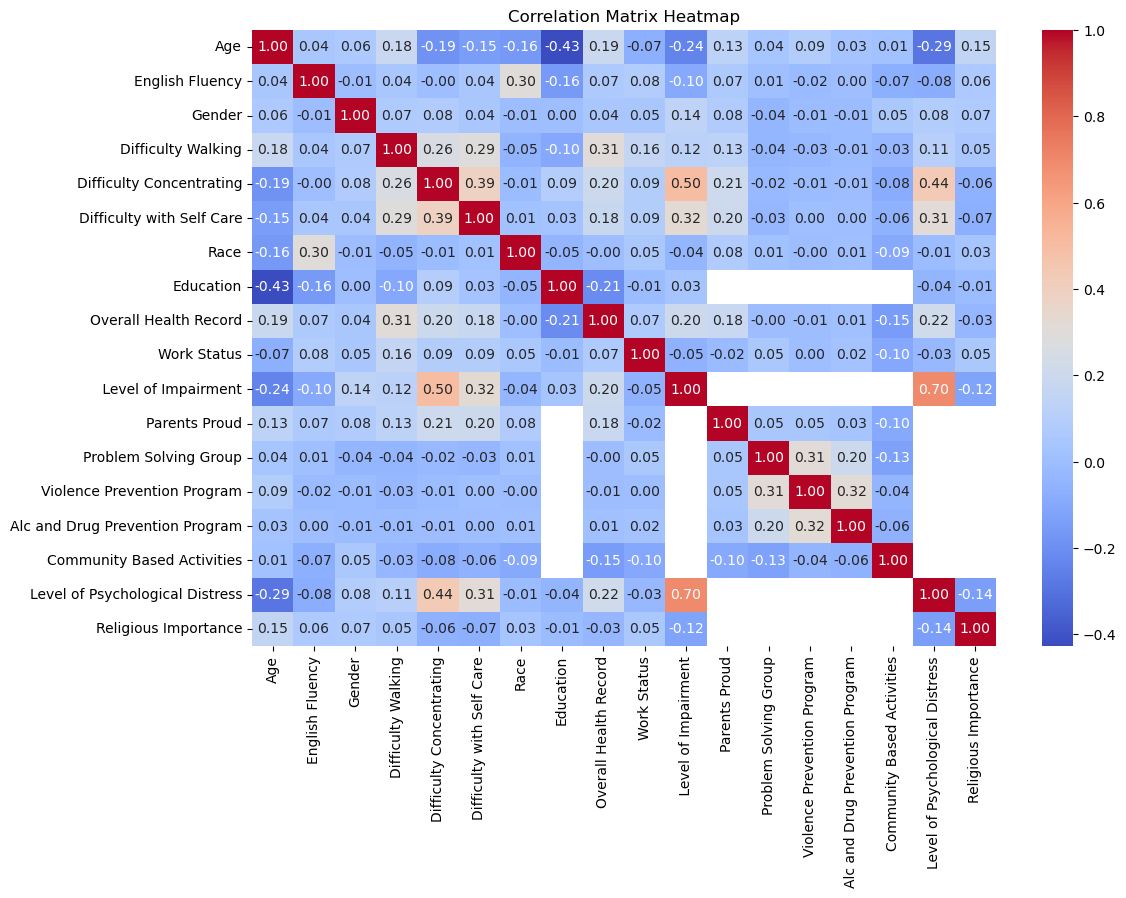

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
#Save the dataframe to use in tableau 
new_df.to_excel("NSDUH_clean_data.xlsx", index=False)

In [17]:
# Path to save the .sav file
output_file = "NSDUH_clean_data.sav"

# Save the DataFrame to .sav format
pyreadstat.write_sav(new_df, output_file)

print(f"File saved to {output_file}")

PyreadstatError: variable name 'English Fluency' contains a space, which is not allowed